In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn   # Алгоритмы машинного обучения  

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tqdm import tqdm

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Прогнозирование CHD заболевания.

Ранний прогноз сердечно-сосудистых заболеваний может помочь в принятии решений об изменении образа жизни у пациентов с высоким риском и, в свою очередь, уменьшить количество осложнений. Это исследование направлено на выявление заболевания по набору факторов риска.

# Загружаем данные

In [4]:
df = pd.read_csv('Downloads/framingham_heart_disease.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# Пропущенные значения

In [6]:
df.describe(include = 'all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


выведем пропущенные (кол-во) значения

In [7]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [8]:
df.fillna(df.median(axis = 0), axis=0 , inplace=True)

In [9]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.979471,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.689476,132.352407,82.893464,25.800205,75.878716,81.603587,0.151958
std,0.495022,8.572160,1.007081,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.327427,22.038097,11.910850,4.071041,12.025185,22.865246,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Разбиение данных на обучающую и тестовую выборки

Для выявления заболевания будем использовать все входные признаки, кроме education

In [11]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
X = df.drop(['TenYearCHD', 'education'], axis=1)
y = df['TenYearCHD']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(3178, 1060)

Cтандартизация

In [14]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

X_train = (X_train - mean) / std
X_test =  (X_test  - mean) / std

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Подбор гиперпараметров

Подбор числа нейронов в однослойном классификаторе

In [15]:
hidden_layer_size = np.linspace(1, 40, 40)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []
train_f1, test_f1 = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                          solver='adam', activation='relu', max_iter=1000, random_state=13)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_f1.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_test_pred, average='weighted'))

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [05:46<00:00,  8.66s/it]


Train: MinError=0.1170547514159849, numberOfNeurons=39
Test: MinError=0.13679245283018868, numberOfNeurons=1


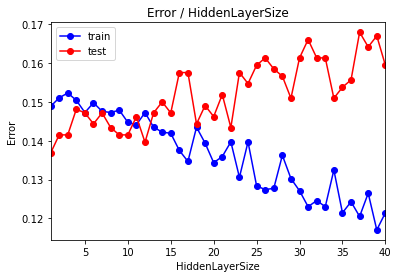

In [16]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error / HiddenLayerSize')
plt.xlabel('HiddenLayerSize')
plt.ylabel('Error')
plt.legend()

print(f"Train: MinError={np.min(train_err)}, numberOfNeurons={hidden_layer_size[np.argmin(train_err)]}")
print(f"Test: MinError={np.min(test_err)}, numberOfNeurons={hidden_layer_size[np.argmin(test_err)]}")

Train: MaxFscore=0.8592192806308806, numberOfNeurons=39
Test: MaxFscore=0.8222563700157391, numberOfNeurons=1


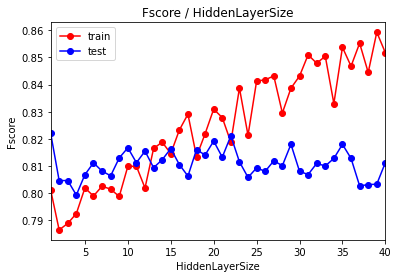

In [17]:
plt.plot(hidden_layer_size, train_f1, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_f1, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Fscore / HiddenLayerSize')
plt.xlabel('HiddenLayerSize')
plt.ylabel('Fscore')
plt.legend()

print(f"Train: MaxFscore={np.max(train_f1)}, numberOfNeurons={hidden_layer_size[np.argmax(train_f1)]}")
print(f"Test: MaxFscore={np.max(test_f1)}, numberOfNeurons={hidden_layer_size[np.argmax(test_f1)]}")

# Подбор числа нейронов в двухслойном классификаторе

In [18]:
n = 10
sizes = np.linspace(1, 40, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_f1 = np.zeros((n, n))
test_f1 = np.zeros((n, n))

for i, size1 in tqdm(enumerate(sizes)):
    for j, size2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size1, size2, ), 
                              solver='adam', activation='relu', max_iter=10000, random_state=13)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_f1[i][j] = f1_score(y_train, y_train_pred, average='weighted')
        test_f1[i][j] = f1_score(y_test, y_test_pred, average='weighted')

10it [26:33, 159.39s/it]


Train: MinError = 0.016047828823159218, numberOfNeurons=(8, 9)
Test: MaxError = 0.1349056603773585, numberOfNeurons=(0, 9)


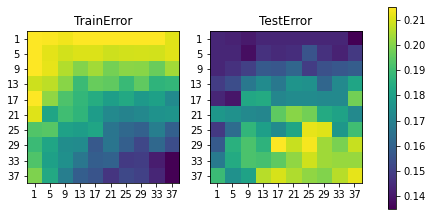

In [19]:
plt.subplot(121)
plt.title("TrainError")
plt.imshow(train_err)
plt.xticks(np.arange(10), np.arange(1, 40, 4))
plt.yticks(np.arange(10), np.arange(1, 40, 4))

plt.subplot(122)
plt.title("TestError")
plt.imshow(test_err)
plt.xticks(np.arange(10), np.arange(1, 40, 4))
plt.yticks(np.arange(10), np.arange(1, 40, 4))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_min_loss_sizes = np.where(train_err == np.min(train_err))
print(f"Train: MinError = {np.min(train_err)}, numberOfNeurons=(" \
      f"{train_min_loss_sizes[0][0]}, {train_min_loss_sizes[1][0]})")

test_min_loss_sizes = np.where(test_err == np.min(test_err))
print(f"Test: MaxError = {np.min(test_err)}, numberOfNeurons=(" \
      f"{test_min_loss_sizes[0][0]}, {test_min_loss_sizes[1][0]})")

Train: MaxFscore = 0.9837081812964866, numberOfNeurons=(8, 9)
Test: MaxFscore = 0.8268537772042376, numberOfNeurons=(4, 1)


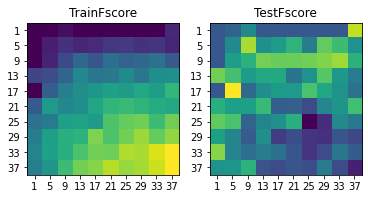

In [20]:
plt.subplot(121)
plt.title("TrainFscore")
plt.imshow(train_f1)
plt.xticks(np.arange(10), np.arange(1, 40, 4))
plt.yticks(np.arange(10), np.arange(1, 40, 4))

plt.subplot(122)
plt.title("TestFscore")
plt.imshow(test_f1)
plt.xticks(np.arange(10), np.arange(1, 40, 4))
plt.yticks(np.arange(10), np.arange(1, 40, 4))


train_max_fscore_sizes = np.where(train_f1 == np.max(train_f1))
print(f"Train: MaxFscore = {np.max(train_f1)}, numberOfNeurons=(" \
      f"{train_max_fscore_sizes[0][0]}, {train_max_fscore_sizes[1][0]})")

test_max_fscore_sizes = np.where(test_f1 == np.max(test_f1))
print(f"Test: MaxFscore = {np.max(test_f1)}, numberOfNeurons=(" \
      f"{test_max_fscore_sizes[0][0]}, {test_max_fscore_sizes[1][0]})")

# Подбор параметра регуляризации

In [21]:
alpha_arr = np.logspace(-5, 5, 50)
test_err = []
train_err = []
train_f1 = []
test_f1 = []

for alpha in tqdm(alpha_arr):
    mlp_model = MLPClassifier(alpha = alpha, 
                              hidden_layer_sizes = (22,), 
                              solver='adam', 
                              activation='relu', 
                              max_iter=1000,
                              random_state=13)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_f1.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_test_pred, average='weighted'))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:28<00:00,  4.16s/it]


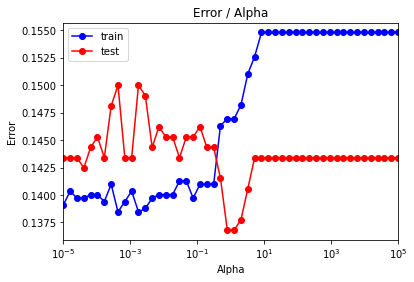

In [24]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error / Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()

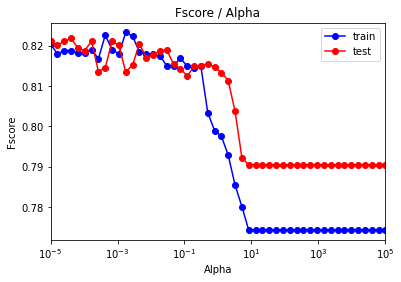

In [26]:
plt.semilogx(alpha_arr, train_f1, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_f1, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Fscore / Alpha')
plt.xlabel('Alpha')
plt.ylabel('Fscore')
plt.legend()

# Вывод:

Графики Error и Fscore для train/test похожи, значит распледеления тренировочных и тестовых данных примерно схожи. Наблюдаем, что с ростом коэффициента регуляризации растет Error, Fscore падает, таким образом, больших значений весовых коэффициентов не возникает, следовательно, нет переобучения модели.